In [14]:
from loica import *
import matplotlib.pyplot as plt
import numpy as np
import getpass

In [15]:
from flapjack import *
#fj = Flapjack(url_base='flapjack.rudge-lab.org:8000')
fj = Flapjack(url_base='localhost:8000')
fj.log_in(username=input('Flapjack username: '), password=getpass.getpass('Password: '))

Flapjack username: tim
Password: ········


In [30]:
dna = fj.get('dna', name='AND3')
if len(dna)==0:
    dna = fj.create('dna', name='AND3')
vector = fj.get('vector', name='AND3')    
if len(vector)==0:
    vector = fj.create('vector', name='AND3', dnas=dna.id)
    
and_ = GeneticNetwork(vector=vector.id[0])

In [31]:
ahl1 = Supplement(name='AHL1')
ahl2 = Supplement(name='AHL2')

In [32]:
cfp = fj.get('signal', name='CFP')
cfp = Reporter(name='CFP', degradation_rate=0, signal_id=cfp.id[0])

In [35]:
rep1 = Regulator('Repressor 1')
rep2 = Regulator('Repressor 2')
rep3 = Regulator('Repressor 3')
rep4 = Regulator('Repressor 4')
rep5 = Regulator('Repressor 5')
rep6 = Regulator('Repressor 6')
reps = [rep1, rep2, rep3, rep4, rep5, rep6]

rec1 = Receiver(ahl1, rep1, a=0, b=100, K=1, n=2)
rec2 = Receiver(ahl1, rep2, a=0, b=100, K=1, n=2)
rec3 = Receiver(ahl2, rep3, a=0, b=100, K=1, n=2)
rec4 = Receiver(ahl2, rep4, a=0, b=100, K=1, n=2)
recs = [rec1, rec2, rec3, rec4]

nor1 = Nor([reps[0],reps[1]], reps[4], a=[100,100], b=[0,0], K=[1,1], n=[2,2], alpha=[0,1,1,1])
nor2 = Nor([reps[2],reps[3]], reps[5], a=[100,100], b=[0,0], K=[1,1], n=[2,2], alpha=[0,1,1,1])
nor3 = Nor([reps[4],reps[5]], cfp, a=[100,100], b=[0,0], K=[1,1], n=[2,2], alpha=[0,1,1,1])

In [36]:
and_.add_reporter(cfp)
and_.add_regulators(reps)
#and_.add_regulator(rep2)
#and_.add_regulator(rep3)
#and_.add_regulator(rep4)
#and_.add_regulator(rep5)
#and_.add_regulator(rep6)

and_.add_operators(recs)
#and_.add_operator(rec2)
#and_.add_operator(rec3)
#and_.add_operator(rec4)

and_.add_operator(nor1)
and_.add_operator(nor2)
and_.add_operator(nor3)
    

In [37]:
def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 4)
    
metab = SimulatedMetabolism(biomass, growth_rate)

In [38]:
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')

# Create list of samples    
samples = []
for conc1 in np.logspace(-3, 3, 12):
    for conc2 in np.logspace(-3, 3, 12):
        sample = Sample(circuit=and_, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0])
        # Add AHL to samples at given concentration
        sample.add_supplement(ahl1, conc1)
        sample.add_supplement(ahl2, conc2)
        samples.append(sample)

In [39]:
biomass_signal = fj.get('signal', name='OD')
assay = Assay(samples, 
              n_measurements=100, 
              interval=0.25,
              name='Loica AND from NOR',
              description='Simulated AND gate made from 3 NOR gates generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

In [43]:
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')

assay.upload(fj, study.id[0])

,Measurement,Sample,Signal,Signal_id,Time


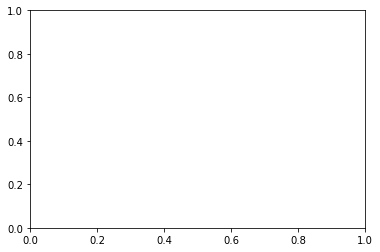

In [28]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='OD'] #.plot(x='Time', y='Measurement', style='.', ax=ax)

In [ ]:
m

In [11]:
import networkx as nx

In [12]:
G = nx.DiGraph()
for op in and_.operators:
    if type(op.input)==list:
        for i in op.input:
            G.add_edge(i, op)
    else:
        G.add_edge(op.input, op)
    if type(op.output)==list:
        for i in op.output:
            G.add_edge(op, i)
    else:
        G.add_edge(op, op.output)

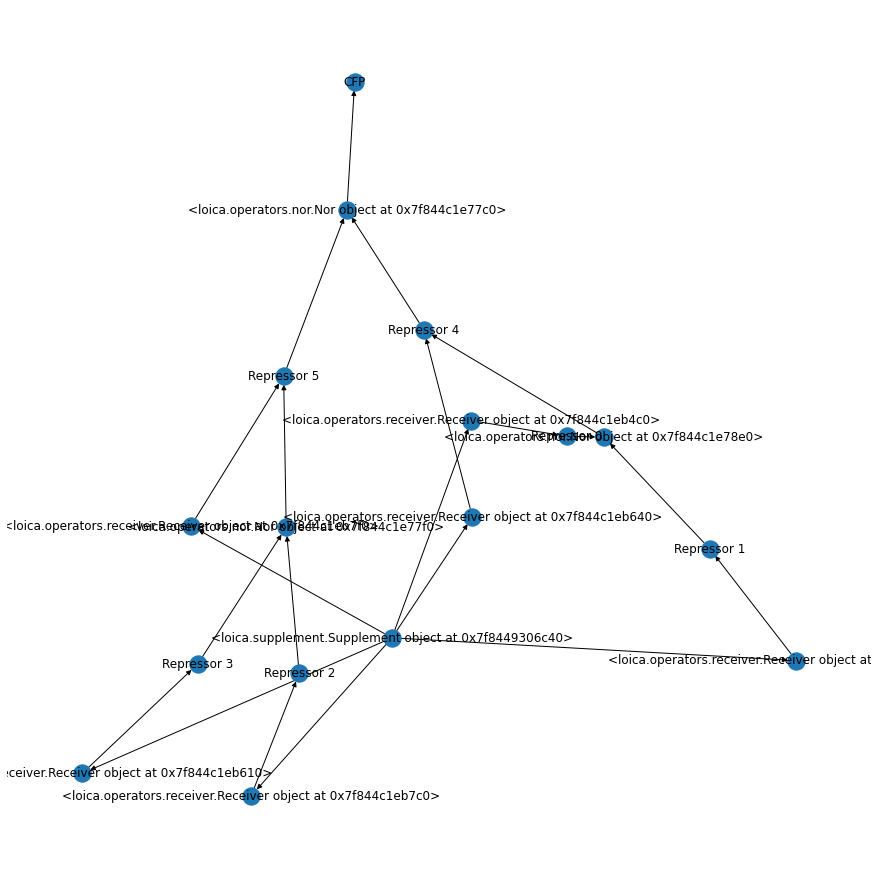

In [13]:
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True)

In [ ]:
len(9)